# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [96]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0, dtype = {"num_dependents" : "object"})


# 1 Вопрос

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

<ol>
<li><strong>checking_status(Статус существующего текущего счета)</strong>  Порядковая </li> 
<li><strong>duration(Продолжительность в месяцах)</strong>  Абсолютная </li> 
<li><strong>credit_history</strong>  Номинальная </li> 
<li><strong>purpose</strong>  Номинальная  </li>               
<li><strong>credit_amount</strong>  Абсолютная  </li>          
<li><strong>savings_status(Сберегательный счет / облигации)</strong>  Порядковая </li>            
<li><strong>employment(Настоящая занятость с)</strong>  Порядковая </li>            
<li><strong>installment_commitment(Размер рассрочки в процентах от располагаемого дохода)</strong>  Абсолютная </li> 
<li><strong>other_parties(Прочие должники / поручители)</strong>  Номинальная </li>         
<li><strong>property_magnitude(Собственность)</strong>  Номинальная </li>      
<li><strong>age</strong>  Абсолютная  </li>                 
<li><strong>other_payment_plans(Другие планы рассрочки)</strong>  Номинальная </li>    
<li><strong>housing</strong>  Номинальная </li>              
<li><strong>existing_credits</strong>  Абсолютная </li>      
<li><strong>job</strong>  Номинальная </li>                   
<li><strong>num_dependents(Количество неработующих в семье)</strong>  Абсолютная  </li>         
<li><strong>foreign_worker</strong>  Номинальная </li>           
<li><strong>class</strong>  Номинальная </li>   
</ol>

# 2 Вопрос

#### Укажите признак с наименьшей дисперсией: existing_credits

In [6]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits
count,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420
std,12.748,2822.553,1.106,11.274,0.586
min,-1.000,250.000,1.000,19.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000
max,72.000,18424.000,4.000,75.000,4.000


# 3 Вопрос

#### Среднее какого признака отличается для двух классов сильнее всего: credit_amount

In [7]:
abs(credit_df[credit_df["class"] == "bad"].mean() - credit_df[credit_df["class"] == "good"].mean())

duration                    4.982
credit_amount             573.110
installment_commitment      0.103
age                         3.304
existing_credits            0.099
dtype: float64

# 4 Вопрос
#### В каком классе больше всего skilled работников: в классе good

In [24]:
pd.crosstab(credit_df["class"], credit_df["job"])

job,high qualif/self emp/mgmt,skilled,unemp/unskilled non res,unskilled resident
class,,,,
bad,18,107,3,36
good,48,213,8,69


# 5 Вопрос

#### Есть ли в наборе признаки с выбросами? Какие? Да: credit_amount, duration, age, existing_credits

In [3]:
normal_df = credit_df

In [4]:
min_max_scaler = MinMaxScaler()
normal_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits"]] = min_max_scaler.fit_transform(normal_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits"]])

<AxesSubplot:>

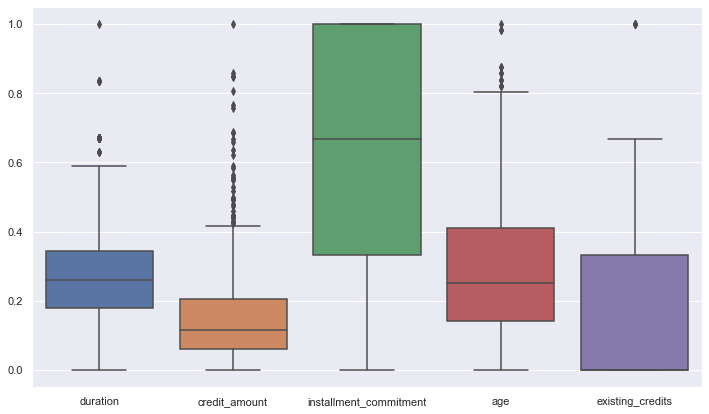

In [5]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=normal_df)

In [3]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good


# 6 Вопрос

#### Сколько пропущенных значений в наборе? 395

In [8]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits
count,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420
std,12.748,2822.553,1.106,11.274,0.586
min,-1.000,250.000,1.000,19.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000
max,72.000,18424.000,4.000,75.000,4.000


In [40]:
for col in credit_df.columns:
    print(col, credit_df[col].unique())

checking_status ['0<=X<200' '>=200' '<0' 'no checking']
duration [18.  6. 24. 36.  9. 10. 15. 39. 12. -1. 48. 26.  4. 21. 30. 60. 42. 14.
 72. 27. 20.  8. 13. 22. 40. 45. 11. 28. 16.]
credit_history ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']
purpose ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']
credit_amount [ 1301.  1323.  3123.  5493.  1126.  1216.  1207.  1309.  2360.  6850.
  1413.  8588.   759.  4686.  2687.   585.  2255.   609.  1361.  7127.
  1203.   700.  5507.  3190.  7119.  3488.  1113.  7966.  1532.  1503.
  2302.   662.  2273.  2631.  1311.  3105.  2319.  1374.  3612.  7763.
  3049.  1534.  2032.  6350.  2864.  1255.  1333.  2022.  1552.   626.
  8858.   996.  1750.  6999.  1995.  1199.  1331.  2278.  5003.  3552.
  1928.  2964.  1546.   683. 12389.  4712.  1553.  1372.  2578.  3979.
  6758.  3234.  5954.  5433.   806.  1082.  

In [15]:
(credit_df['duration'] < 0).sum()

27

In [27]:
credit_df['checking_status'].unique()

array(['0<=X<200', '>=200', '<0', 'no checking'], dtype=object)

In [25]:
(credit_df['checking_status'] == 'no checking').sum()

197

In [31]:
credit_df['savings_status'].unique()

array(['<100', '100<=X<500', 'no known savings', '500<=X<1000', '>=1000'],
      dtype=object)

In [34]:
(credit_df['savings_status'] == 'no known savings').sum()

95

In [42]:
credit_df['property_magnitude'].unique()

array(['real estate', 'car', 'life insurance', 'no known property'],
      dtype=object)

In [9]:
(credit_df['property_magnitude'] == 'no known property').sum()

76

In [29]:
credit_df["employment"].value_counts()

1<=X<4        162
>=7           125
<1             92
4<=X<7         88
unemployed     27
0               8
Name: employment, dtype: int64

In [37]:
(credit_df['duration'] < 0).sum() \
+ (credit_df['checking_status'] == 'no checking').sum() \
+ (credit_df['savings_status'] == 'no known savings').sum() \
+ (credit_df['property_magnitude'] == 'no known property').sum() \
+ (credit_df["employment"] == "0").sum()

403

# 7 Вопрос
#### Попытайтесь заполнить пропущенные значения.

In [105]:
credit_df["duration"].value_counts()  #мода 24
credit_df.loc[:, "duration"] = credit_df["duration"].replace(-1, 24)

In [86]:
credit_df["checking_status"].value_counts() #непонятно, как тут обрабатывать. треть значение неизвестно. неинформативный признак

no checking    197
<0             146
0<=X<200       126
>=200           33
Name: checking_status, dtype: int64

In [106]:
credit_df["savings_status"].value_counts()
credit_df.loc[:, "savings_status"] = credit_df["savings_status"].replace("no known savings", "<100")

In [109]:
credit_df["property_magnitude"].value_counts() 
credit_df.loc[:, "property_magnitude"] = credit_df["property_magnitude"].replace("no known property", "car")

In [144]:
credit_df["employment"].value_counts() 
credit_df.loc[:, "employment"] = credit_df["employment"].replace(0, "unemployed")

In [121]:
credit_df[(credit_df["duration"] == -1) | (credit_df["savings_status"] == "no known savings") | (credit_df["property_magnitude"] == "no known property") | (credit_df["employment"] == 0)].count()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
foreign_worker            0
class                     0
dtype: int64

# 8 Вопрос
#### Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.


<AxesSubplot:>

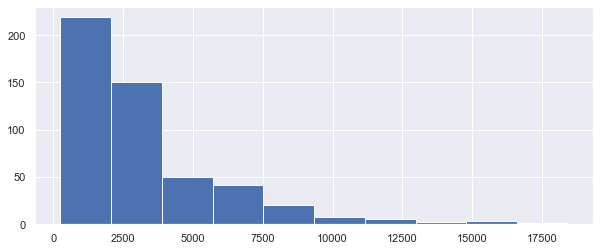

In [131]:
credit_df["credit_amount"].hist(figsize=(10,4)) #Абсолютный признак

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

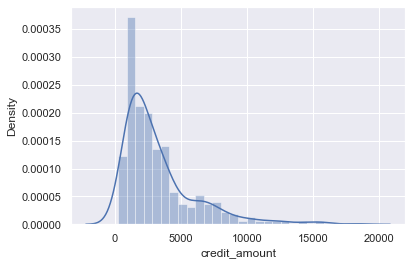

In [132]:
sns.distplot(credit_df["credit_amount"])

<AxesSubplot:>

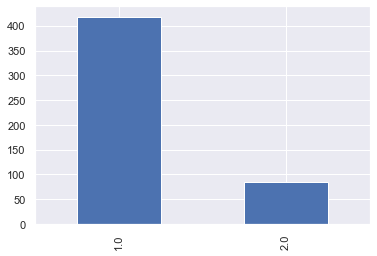

In [125]:
credit_df['num_dependents'].value_counts().plot(kind='bar') #Номинальный признак

<AxesSubplot:xlabel='checking_status', ylabel='count'>

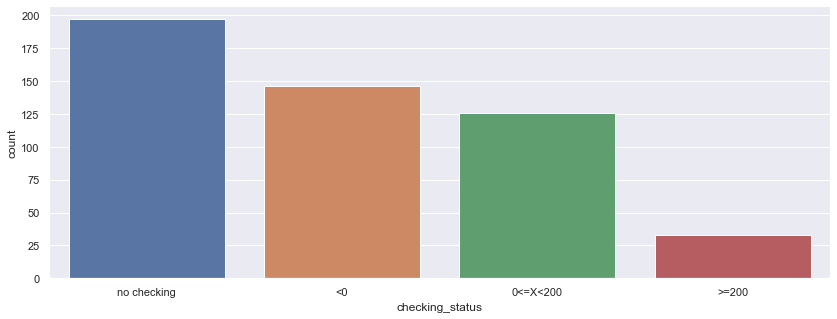

In [137]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 5)) #Категориальный признак
sns.countplot(x="checking_status", data=credit_df, order=credit_df["checking_status"].value_counts().index, ax=axes)

# 9 Вопрос
#### Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

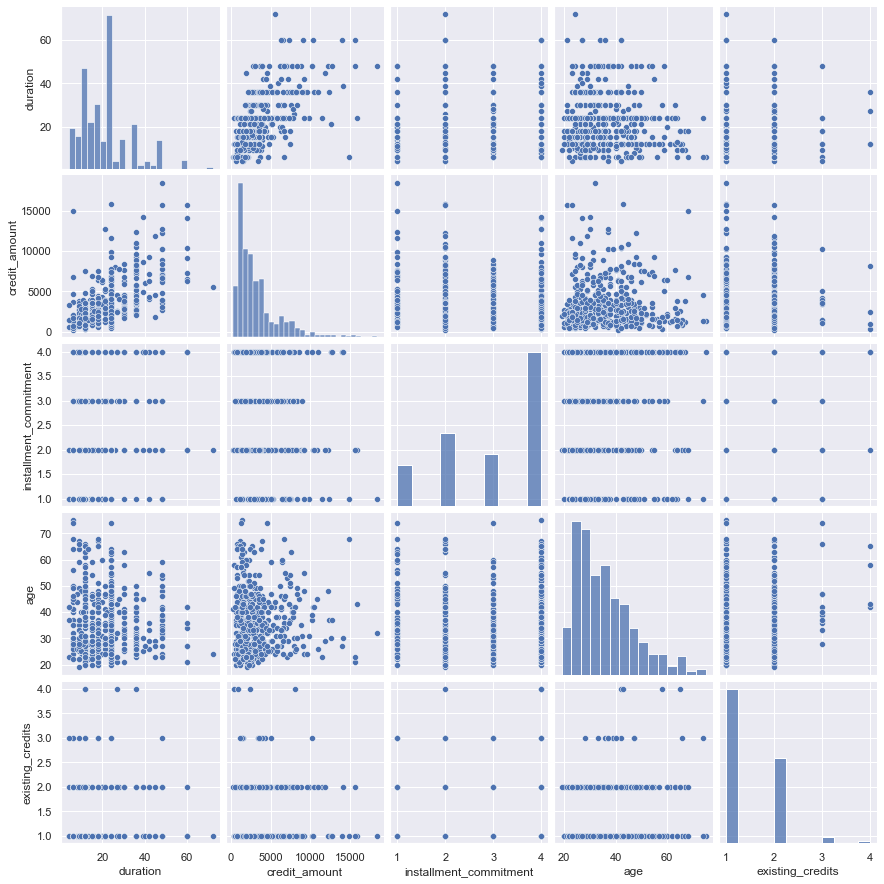

In [140]:
num_columns = list(["duration", "credit_amount", "installment_commitment", "age", "existing_credits"])
sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

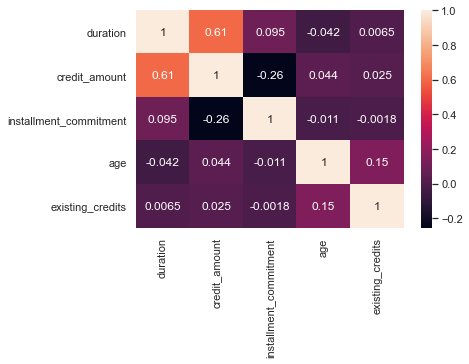

In [142]:
corr_matrix = credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

<AxesSubplot:xlabel='savings_status', ylabel='count'>

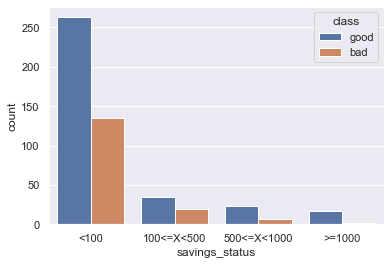

In [145]:
sns.countplot(x='savings_status', hue='class', data=credit_df)

In [ ]:
#Думаю, что тут еще поиграться можно с признаками в этом вопросе